In [3]:
#opeining image file
import cv2 as cv
import sys
img = cv.imread(cv.samples.findFile("Starry_Night.jpg"))
if img is None:
    sys.exit("Could not read the image.")
cv.imshow("Display window", img)
k = cv.waitKey(0)
 
if k == ord("s"):
    cv.imwrite("Starry_Night.jpg", img)
cv.destroyAllWindows()

In [4]:
#opening video
import numpy as np
import cv2 as cv
cap=cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame=cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray=cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
 
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

In [10]:
#video saving
import numpy as np
import cv2 as cv
 
cap = cv.VideoCapture(0)
 
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))
 
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    #frame = cv.flip(frame, 0)
 
    # write the flipped frame
    out.write(frame)
 
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
 
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

In [8]:
import numpy as np
import cv2 as cv
img = cv.imread('messi.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
px = img[100,100]
print( px )

[64 37 47]


In [9]:
# accessing only blue pixel
blue = img[100,100,0]
print( blue )

64


In [10]:
cv.imshow("Display window", img)
k = cv.waitKey(0)
 
if k == ord("s"):
    cv.imwrite("new.jpg", img)
cv.destroyAllWindows()

In [13]:
img[50:120, 100:200] = [255, 0, 0]
print( img[100,100,1] )

0


In [14]:
cv.imshow("Display window", img)
k = cv.waitKey(0)
 
if k == ord("s"):
    cv.imwrite("new.jpg", img)
cv.destroyAllWindows()

In [17]:
print( img.shape )

(168, 300, 3)


In [18]:
print( img.size )

151200


In [15]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))

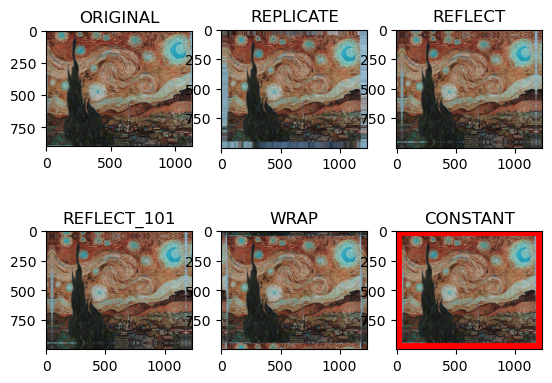

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv.imread('Starry_Night.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"

replicate = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_REPLICATE)
reflect   = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_REFLECT)
reflect101= cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_REFLECT_101)
wrap      = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_WRAP)
constant  = cv.copyMakeBorder(img1,50,50,50,50,cv.BORDER_CONSTANT, value=BLUE)


plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

In [19]:
img1 = cv.imread('messi.jpg')
img2 = cv.imread('Starry_Night.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
img2 = cv.resize(img2, (img1.shape[1], img1.shape[0]))
dst = cv.addWeighted(img1,0.7,img2,0.3,0)

cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [29]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(1)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    lower_blue = np.array([90, 40, 40])    # Start earlier on the hue scale, allow low saturation/value
    upper_blue = np.array([140, 255, 255]) # Go later on the hue scale

    mask = cv.inRange(hsv, lower_blue, upper_blue)
    res = cv.bitwise_and(frame, frame, mask=mask)

    cv.imshow('frame', frame)
    cv.imshow('mask', mask)
    cv.imshow('res', res)

    k = cv.waitKey(5) & 0xFF
    if k == 27:  # ESC key
        break

# Release camera and close windows
cap.release()
cv.destroyAllWindows()


In [1]:
import numpy as np
import cv2 as cv

img = cv.imread('messi.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

#OR

#height, width = img.shape[:2]
#res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

In [2]:
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

In [3]:
import numpy as np
import cv2 as cv

img = cv.imread('messi.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
img = cv.imread('messi.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols = img.shape

# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))

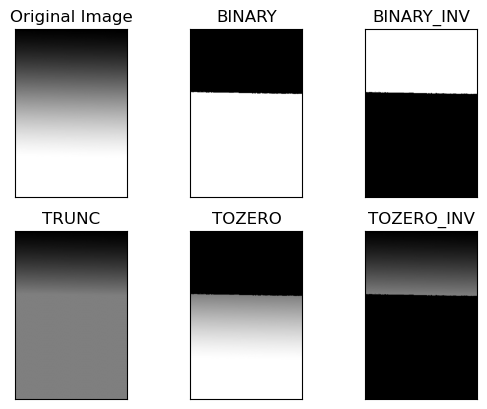

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('gradient.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

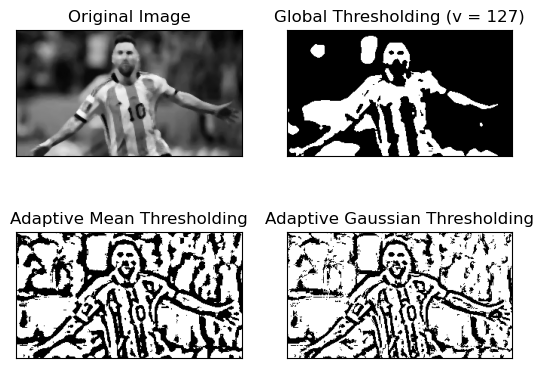

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('messi.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

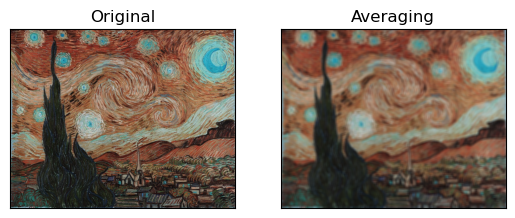

In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('Starry_Night.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

kernel = np.ones((15,15),np.float32)/225
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

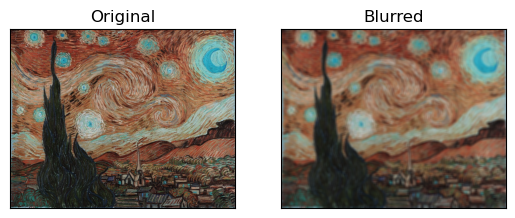

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('Starry_Night.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

blur = cv.blur(img, (15, 15))  # much stronger blur

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

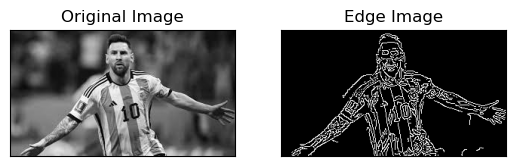

In [11]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('messi.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [6]:
import cv2 as cv
import numpy as np
import glob

# Termination criteria for cornerSubPix
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points for chessboard (0,0,0), (1,0,0), ...
objp = np.zeros((6*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1, 2)  # 7 columns, 6 rows

# Arrays to store object points and image points from all images
objpoints = []  
imgpoints = []  

# Load calibration images
images = glob.glob('data/left*.jpg')  # Make sure you downloaded 'data' folder

image_size = None

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    if image_size is None:
        image_size = gray.shape[::-1]  # store image size once

    # Find the chessboard corners
    ret, corners = cv.findChessboardCorners(gray, (7, 6), None)

    # If found, refine and add points
    if ret:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)

        # Show corners directly
        img = cv.drawChessboardCorners(img, (7, 6), corners2, ret)
        cv.imshow('Corners', img)
        cv.waitKey(300)

cv.destroyAllWindows()

# Camera calibration
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, image_size, None, None)

# Direct output
print("\nCamera Matrix:\n", mtx)
print("\nDistortion Coefficients:\n", dist)
print("\nRotation Vectors:\n", rvecs)
print("\nTranslation Vectors:\n", tvecs)

# Test undistortion
img = cv.imread(images[0])
h, w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

dst = cv.undistort(img, mtx, dist, None, newcameramtx)

# Show undistorted image
cv.imshow("Undistorted", dst)
cv.waitKey(0)
cv.destroyAllWindows()



Camera Matrix:
 [[534.15663137   0.         341.71479627]
 [  0.         534.25492559 232.05013999]
 [  0.           0.           1.        ]]

Distortion Coefficients:
 [[-2.94269293e-01  1.23247846e-01  1.13850492e-03 -1.38021877e-04
   1.02084832e-02]]

Rotation Vectors:
 (array([[-0.43142634],
       [ 0.25379395],
       [-3.08884034]]), array([[ 0.41426793],
       [ 0.65539281],
       [-1.33764399]]), array([[-0.26431364],
       [-0.39636863],
       [-2.74760817]]), array([[-0.30060119],
       [ 0.39118933],
       [-1.4350777 ]]), array([[-0.32188588],
       [ 0.15850432],
       [-1.2418536 ]]), array([[-0.46015187],
       [-0.08996193],
       [-1.33519357]]), array([[-0.24294096],
       [ 0.35446819],
       [ 1.5301419 ]]), array([[ 0.30616402],
       [ 0.50226863],
       [-1.82846255]]), array([[-0.174203  ],
       [-0.46655317],
       [ 1.34790242]]))

Translation Vectors:
 (array([[ 3.79289445],
       [ 0.92423107],
       [14.8637219 ]]), array([[-2.1284028

In [8]:
import cv2

# Load pre-trained Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Read an image
img = cv2.imread(cv2.samples.findFile("data/lena.jpg"))  # OpenCV sample image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

print(f"Number of faces detected: {len(faces)}")

# Draw rectangles around faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the result
cv2.imshow("Detected Faces", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of faces detected: 1


In [9]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

img = cv2.imread(cv2.samples.findFile("data/lena.jpg"))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

cv2.imshow("Face and Eye Detection", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


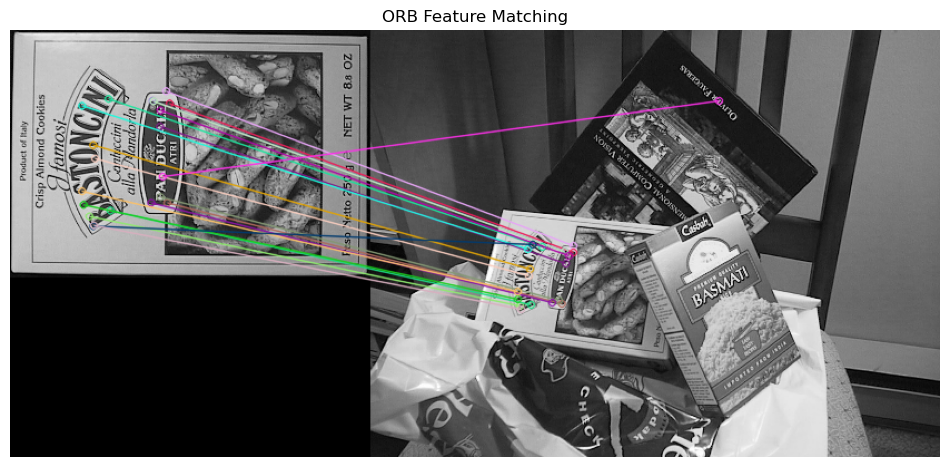

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load two images (grayscale)
img1 = cv2.imread(cv2.samples.findFile('data/box.png'), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(cv2.samples.findFile('data/box_in_scene.png'), cv2.IMREAD_GRAYSCALE)

# 1️⃣ Create ORB detector
orb = cv2.ORB_create()

# 2️⃣ Detect keypoints and compute descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# 3️⃣ Match descriptors using Brute Force Hamming distance
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# 4️⃣ Sort matches by distance (best first)
matches = sorted(matches, key=lambda x: x.distance)

# 5️⃣ Draw first 20 matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show
plt.figure(figsize=(12,6))
plt.imshow(img_matches)
plt.title("ORB Feature Matching")
plt.axis('off')
plt.show()


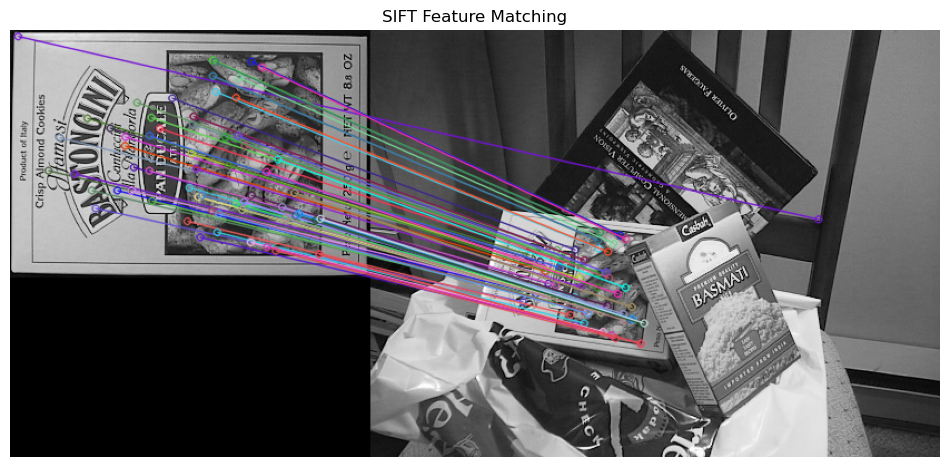

In [3]:
# Create SIFT detector
sift = cv2.SIFT_create()

# Detect and compute
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN based matcher (faster for large datasets)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

# KNN match to get best and second-best matches
matches = flann.knnMatch(des1, des2, k=2)

# Lowe's ratio test to keep only good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches_sift = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

plt.figure(figsize=(12,6))
plt.imshow(img_matches_sift)
plt.title("SIFT Feature Matching")
plt.axis('off')
plt.show()


In [1]:
import cv2 as cv

# Read image
img = cv.imread("data/baboon.jpg")

# Apply Gaussian blur
blur = cv.GaussianBlur(img, (5, 5), 0)

# Convert to grayscale
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# Canny edge detection
edges = cv.Canny(gray, 100, 200)

# Show result
cv.imshow("Edges", edges)
cv.waitKey(0)
cv.destroyAllWindows()


In [29]:
import cv2 as cv
import numpy as np

# Dummy training data: two classes (0 and 1)
train_data = np.array([[0,0],[1,1],[0,1],[1,0]], dtype=np.float32)
labels = np.array([0, 1, 1, 0], dtype=np.int32)

# Create and train a k-NN classifier
knn = cv.ml.KNearest_create()
knn.train(train_data, cv.ml.ROW_SAMPLE, labels)

# Predict a new point
test = np.array([[0.9, 0.9]], dtype=np.float32)
_, result, _, _ = knn.findNearest(test, k=1)

print("Predicted class:", int(result[0][0]))


Predicted class: 1


In [30]:
cap = cv2.VideoCapture(0)  # Webcam
while True:
    ret, frame = cap.read()
    if not ret:
        break

    denoised = cv2.fastNlMeansDenoisingColored(frame, None, 10, 10, 7, 21)
    cv2.imshow("Denoised Video", denoised)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC to exit
        break

cap.release()
cv2.destroyAllWindows()


In [31]:
img = cv2.imread("data/apple.jpg")

enhanced = cv2.detailEnhance(img, sigma_s=10, sigma_r=0.15)

cv2.imshow("Original", img)
cv2.imshow("Enhanced", enhanced)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
import numpy as np
blank = np.zeros((500, 500, 3), dtype='uint8')

# Draw a rectangle
cv.rectangle(blank, (50, 50), (250, 250), (0, 255, 0), thickness=2)

# Draw a circle
cv.circle(blank, (300, 300), 50, (255, 0, 0), thickness=-1)

# Put text on image
cv.putText(blank, 'OpenCV Demo', (50, 400),
           cv.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), thickness=2)

cv.imshow('Drawing', blank)
cv.waitKey(0)
cv.destroyAllWindows()